<a href="https://colab.research.google.com/github/caramos84/Quantum/blob/main/CellularAutomaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Autómatas celulares con hipergrafos
# Carlos Ramos + ChatGPT o1
# 31/03/2025

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Parámetros
num_nodes = 20  # Número de nodos en el grafo
initial_active_prob = 0.3  # Probabilidad inicial de que un nodo esté "vivo"
steps = 10  # Número de iteraciones

# Crear un grafo aleatorio
G = nx.erdos_renyi_graph(num_nodes, 0.3)  # Grafo aleatorio con 30% de probabilidad de conexión

# Inicializar estados de los nodos (1 = vivo, 0 = muerto)
node_states = {n: np.random.choice([0, 1], p=[1-initial_active_prob, initial_active_prob]) for n in G.nodes()}

# Función para actualizar el estado de los nodos según una regla adaptada del Juego de la Vida
def update_states(G, states):
    new_states = states.copy()
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        alive_neighbors = sum(states[n] for n in neighbors)

        if states[node] == 1:  # Nodo vivo
            if alive_neighbors < 2 or alive_neighbors > 3:
                new_states[node] = 0  # Muere por soledad o sobrepoblación
        else:  # Nodo muerto
            if alive_neighbors == 3:
                new_states[node] = 1  # Nace si tiene exactamente 3 vecinos vivos

    return new_states

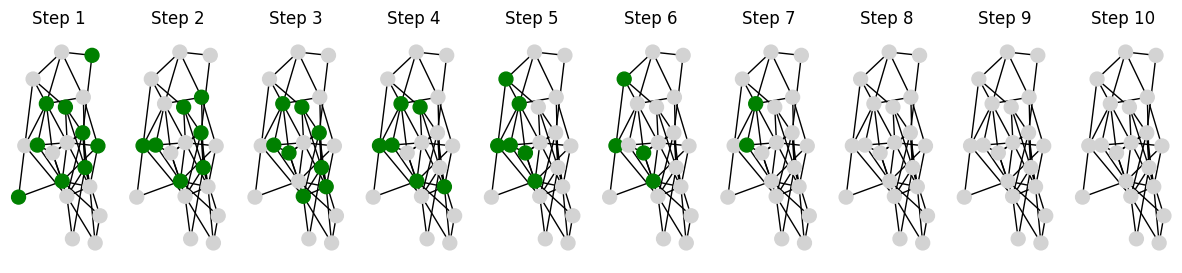

In [18]:
# Simulación
fig, axes = plt.subplots(1, steps, figsize=(15, 3))
for i in range(steps):
    ax = axes[i]
    colors = ["green" if node_states[n] == 1 else "lightgray" for n in G.nodes()]
    nx.draw(G, pos=nx.spring_layout(G, seed=42), node_color=colors, ax=ax, with_labels=False, node_size=100)
    ax.set_title(f"Step {i+1}")
    node_states = update_states(G, node_states)

plt.show()